In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans, MeanShift
import seaborn as sns

points = []
with open("Points.txt", "r") as f:
    n = f.readline()
    for i in range(int(n)):
        x, y = f.readline().split("\n")[0].split(" ")
        points.append([x,y])
points = np.array(points, np.float)
for i in [0, 1]:
    points[:, i] = (points[:, i] - points[:, i].min()) * 35
points = np.array(points, np.int64)
img = np.zeros((420, 430))

418 429


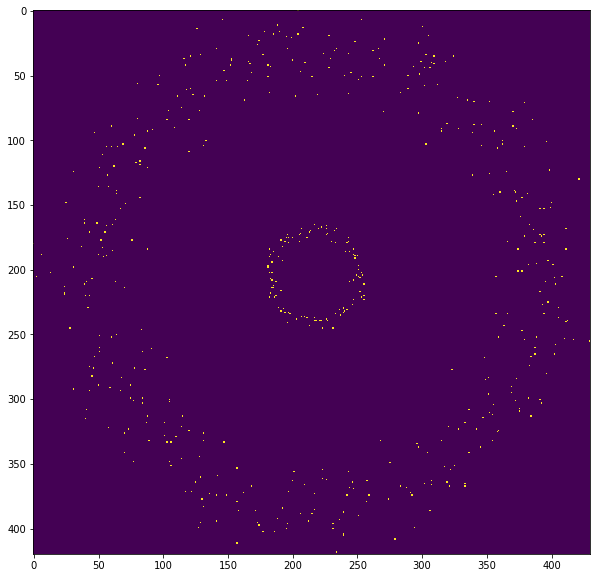

In [2]:
print(points[:, 0].max(), points[:, 1].max())
for point in points:
    img[point[0], point[1]] = 1
    img[point[0], point[1]] = 1
    img[point[0], point[1]] = 1
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.imsave("im01.jpg", img)

In [3]:
def kmean_cluster_and_save(points, name):
    img = np.zeros((420, 430))
    kmeans = KMeans(n_clusters=2)
    predicts = kmeans.fit_predict(points)
    for i, pred in enumerate(predicts):
        img[points[i,0], points[i,1]] = 1 - 0.5*pred
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.imsave(name, img)

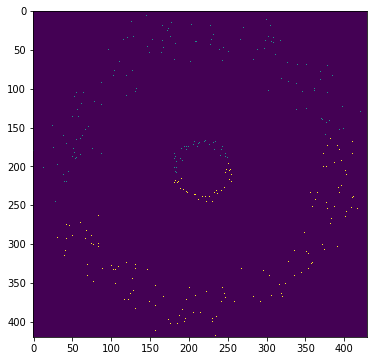

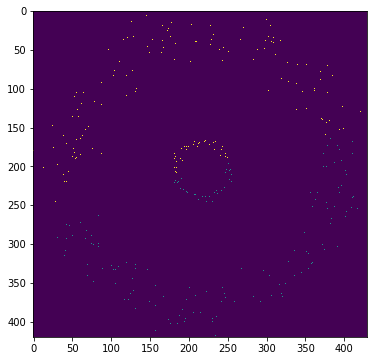

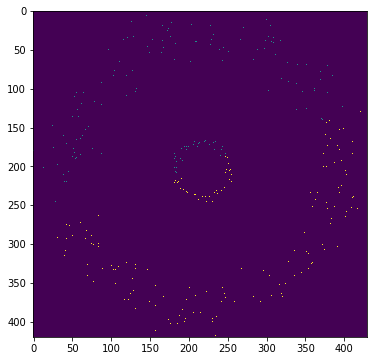

In [4]:
for i in range(3):
    kmean_cluster_and_save(points, "im02.jpg")

<div dir="rtl">
همانطور که مشخص است، نقاط در حول دو دایره از مرکز قرار دارند. البته این نقاط کمی شیف خورده انده و مقیاس شده اند که بهتر نمایش داده شوند و تاثیری در خروجی ندارد.
</div>

<div dir="rtl">
برای خوشه بندی با استفاده از kmeans،‌چون نقاط اولیه تصادفی هستند و مرکز دسته ها نقطه تعادل یکتایی ندارد و به چندین شکل می تواند به دو دسته تقسیم شود که نتیجه معادل هم شوند، نتایج در هر بار اجرا متفاوت است
</div>


In [5]:
def meanshift_cluster_and_save(points):
    img = np.zeros((420, 430))
    meanshift = MeanShift()
    predicts = meanshift.fit_predict(points)
    for i, pred in enumerate(predicts):
        img[points[i,0], points[i,1]] = 1 - 0.5*pred
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.imsave("im03.jpg", img)

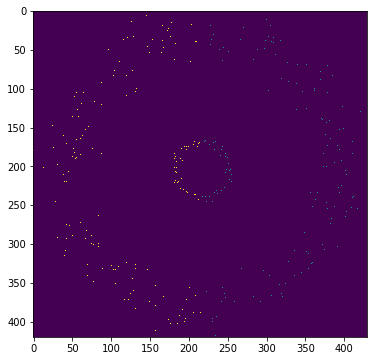

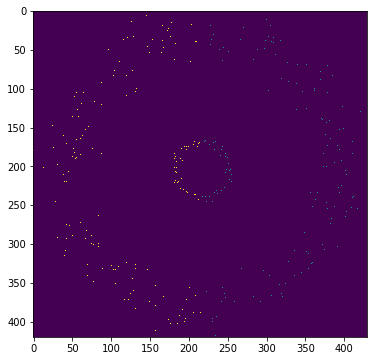

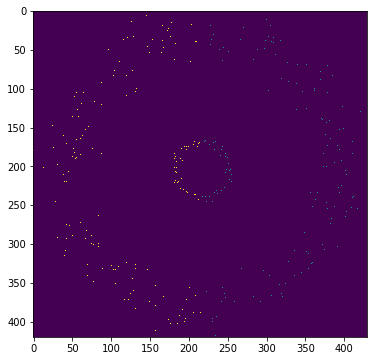

In [6]:
for i in range(3):
    meanshift_cluster_and_save(points)

<div dir="rtl">
در خوشه بندی با استفاده از مین-شیفت، چون به دنبال نقطه با تراکم بالا تر می گردیم و در شکل نیز این نقاط محدود و مشخص هستند، جواب تقریبا ثابت بوده
</div>

<div dir="rtl">
چون نقاط عکس، حول چند مرکز متمرکز نیستند و به صورت پخش و گسسته هستند، این نوع خوشه بندی نیز خوب جواب نمی دهد.
</div>

In [7]:
pts = points

In [8]:
points = pts

218 229
-200 -200


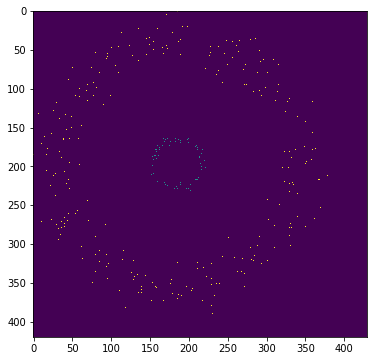

In [9]:
points = pts
def conv2pol(x, y):
    return np.vstack((np.sqrt(x**2 + y**2), np.arctan2(y, x))).T

def conv2cart(r, theta):
    return np.vstack((np.array(np.multiply(r, np.sin(theta)), np.int64), np.array(np.multiply(r, np.cos(theta)), np.int64))).T

polars = []
points = points - 200
print(points[:, 0].max(), points[:, 1].max())
print(points[:, 0].min(), points[:, 1].min())
polars = conv2pol(points[:, 0], points[:, 1])
polars = np.array(polars, np.float)
img = np.zeros((420, 430))
kmeans = KMeans(n_clusters=2)
predicts =  kmeans.fit_predict(polars)
cart = conv2cart(polars[:, 0], polars[:, 1])
cart += 200
cart = cart/1.1
cart = np.array(cart, np.int64)
for i, pred in enumerate(predicts):
    img[cart[i, 0], cart[i, 1]] = 1 - 0.5*pred
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.imsave("im04.jpg", img)

<div dir="rtl">
با تبدیل نقاط به فضای قطبی که نسبت به نقطه وسط عکس نسجیده می شود، می توان به سادگی خوشه بندگی کرد، به این علت که در فضای قطبی، نقاط برروی دو دایره قرار دارند یعنی در نقاط مربوط به شعاع خود، به صورت چگال و متراکم قرار گرفته اند که با اینکار، هر دو خوشه بندی می تواند استفاده شود و جواب می دهد
</div>